In [1]:
# get recall and precision for dictionary 


In [30]:
import pandas as pd
PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/pickle_files/'

In [51]:
def get_data():
    df = pd.read_pickle(PATH_TO_DATA + 'all_data.pkl')
    return df

def get_recall_precision(topics, sample):
    
    true_positives = ["_tp " + str(i) for i in topics]
    false_positives = ["_fp " + str(i) for i in topics]
    false_negatives = ["_fn " + str(i) for i in topics]
    
    true_positives_st = ["st_tp " + str(i) for i in topics]
    false_positives_st = ["st_fp " + str(i) for i in topics]
    false_negatives_st = ["st_fn " + str(i) for i in topics]
   
    recall = {}
    precision = {}
    
    recall_stemmed = {}
    precision_stemmed = {}
    
    df = get_data()
    
    if sample == 'all':
        df = df
    elif sample == 'newspaper':
        df = df[df['type'] == 'newspaper']
    elif sample == 'parlementary question' :
        df = df[df['type'] == 'parlementary question']
    elif sample == 'RPA' :
        df = df[df['origin'] == 'RPA']    
    elif sample == 'Bjorn' :
        df = df[df['origin'] == 'Bjorn']    
        
    
    for tp, fp, fn, st_tp, st_fp, st_fn, topic in zip(true_positives, false_positives, false_negatives, true_positives_st, false_positives_st, false_negatives_st, topics) :   
        
        recall[str(topic)] = df[tp].sum(axis=0) / ( df[tp].sum(axis=0) + df[fn].sum(axis=0) )
        precision[str(topic)] = df[tp].sum(axis=0) / ( df[tp].sum(axis=0) + df[fp].sum(axis=0) )
        
        recall_stemmed[str(topic)] = df[st_tp].sum(axis=0) / ( df[st_tp].sum(axis=0) + df[st_fn].sum(axis=0) )
        precision_stemmed[str(topic)] = df[st_tp].sum(axis=0) / ( df[st_tp].sum(axis=0) + df[st_fp].sum(axis=0) )

    recall['total'] = sum(recall.values()) / len(recall.values())
    precision['total'] = sum(precision.values()) / len(precision.values())
    recall_stemmed['total'] = sum(recall_stemmed.values()) / len(recall_stemmed.values())
    precision_stemmed['total'] = sum(precision_stemmed.values()) / len(precision_stemmed.values())
    
    return recall, precision, recall_stemmed, precision_stemmed

In [52]:
topics = list(df['main_topic_label'].unique())

recall, precision, recall_stemmed, precision_stemmed = get_recall_precision(topics, 'all')


In [54]:
print("recall total: {}".format(recall['total']))
print("precision total: {}".format(precision['total']))

print("recall stemmed total : {}.".format(recall_stemmed['total']))
print("precision stemmed total: {}".format(precision_stemmed['total']))


recall total: 0.17103515654862236
precision total: 0.5034093968372203
recall stemmed total : 0.2434197310270072.
precision stemmed total: 0.47275614234067515


In [62]:
d_deeplearning_recall = {'Arbeid': 0.856,
 'Buitenlandse zaken en ontwikkelingssamenwerking': 0.9261744966442953,
 'Burgerrechten en vrijheden': 0.7397260273972602,
 'Defensie': 0.38636363636363635,
 'Energiebeleid': 0.48,
 'Functioneren democratie en openbaar bestuur': 0.9544401544401544,
 'Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning': 0.20567375886524822,
 'Gezondheid': 0.9435336976320583,
 'Immigratie en integratie': 0.7044334975369458,
 'Justitie, Rechtspraak, Criminaliteit': 0.908541846419327,
 'Landbouw en Visserij': 0.49375,
 'Macro-economie en belastingen': 0.7963446475195822,
 'Milieu': 0.8029556650246306,
 'Ondernemingen, Bankwezen en binnenlandse handel ': 0.894,
 'Onderwijs': 0.5065502183406113,
 'Overige': 0.9874415168677666,
 'Verkeer en vervoer': 0.8632075471698113,
 'Wetenschappelijk onderzoek, technologie en communicatie': 0.8528610354223434,
 'sociale Zaken': 0.823170731707317,
 'total': 0.7434299198605784}

In [97]:
d1 = pd.DataFrame(recall, index=['recall dictionary'])
d2 = pd.DataFrame(d_deeplearning_recall, index=['recall deeplearning'])
d = pd.concat([d1, d2]).transpose()
d['topic'] = d.index

d = pd.melt(d, id_vars=['topic'], value_vars=['recall dictionary', 'recall deeplearning'], var_name = 'Classifier', value_name='recall')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


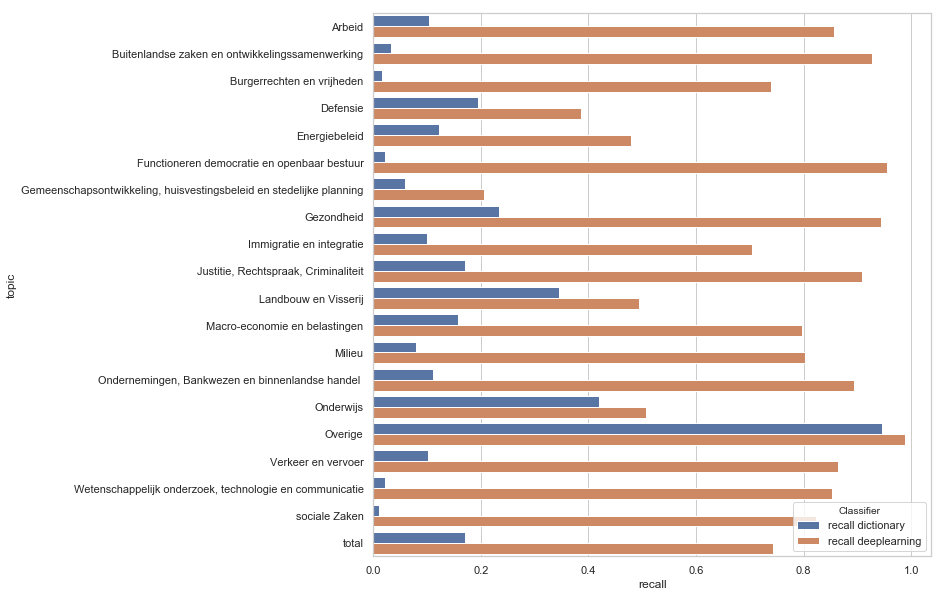

In [104]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10,10))

sns.set(style="whitegrid")
ax = sns.barplot(y="topic", x= "recall", hue = "Classifier", data=d)

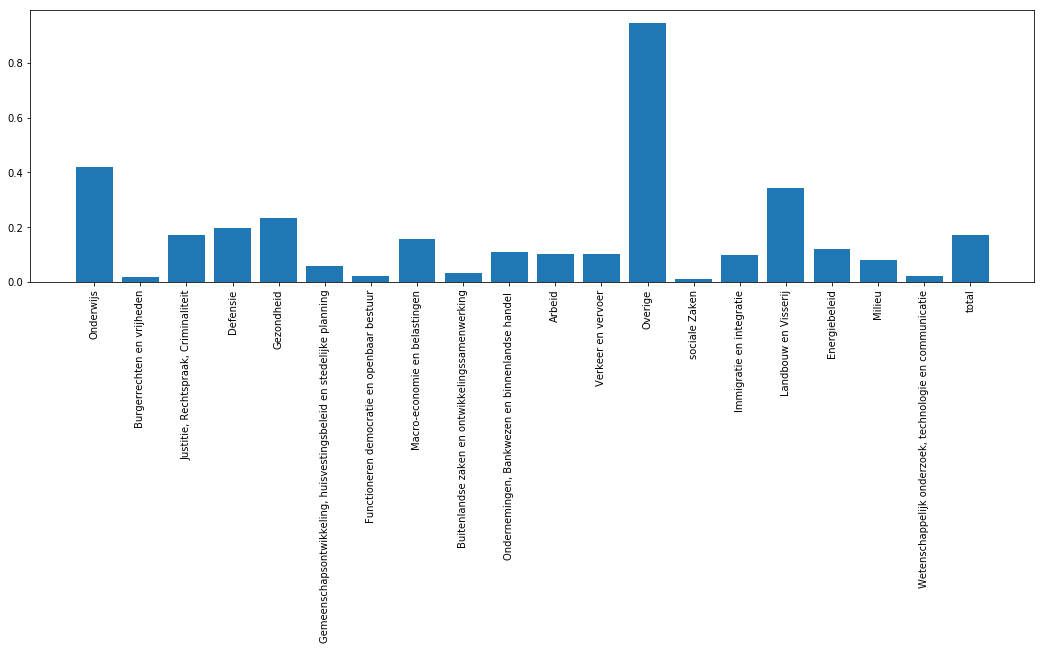

In [55]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(18,5))
plt.bar(range(len(recall)), recall.values(), align="center")
plt.xticks(range(len(recall)), list(recall.keys()))
plt.xticks(rotation=90)
plt.show()


In [106]:
import pandas as pd
pd.__version__

'0.25.0'

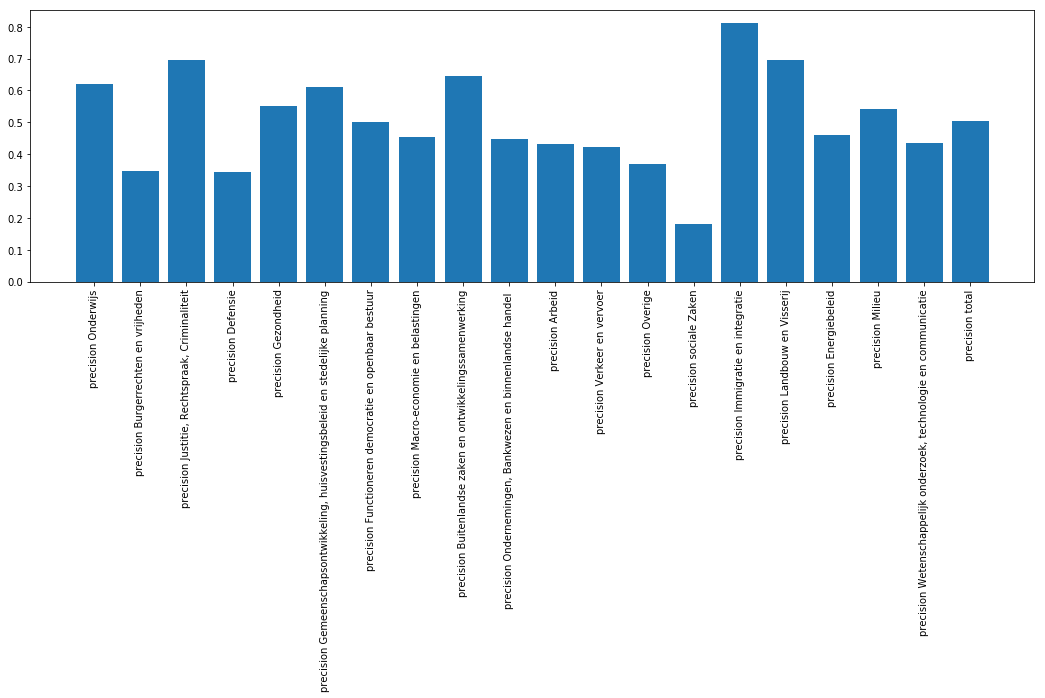

In [50]:
f, ax = plt.subplots(figsize=(18,5))
plt.bar(range(len(precision)), precision.values(), align="center")
plt.xticks(range(len(precision)), list(precision.keys()))
plt.xticks(rotation=90)
plt.show()


In [37]:
for t, s in recall.items():
    print('{} -- {}'.format(t, s))
    
print()

for t, s in precision.items():
    print('{} -- {}'.format(t, s))

print()

    
for t, s in recall_stemmed.items():
    print('{} -- {}'.format(t, s))
    
print()

for t, s in precision_stemmed.items():
    print('{} -- {}'.format(t, s))


recall Onderwijs -- 0.41901408450704225
recall Burgerrechten en vrijheden -- 0.017057569296375266
recall Justitie, Rechtspraak, Criminaliteit -- 0.17144808743169399
recall Defensie -- 0.19556451612903225
recall Gezondheid -- 0.2334293948126801
recall Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning -- 0.060109289617486336
recall Functioneren democratie en openbaar bestuur -- 0.02122347066167291
recall Macro-economie en belastingen -- 0.15767634854771784
recall Buitenlandse zaken en ontwikkelingssamenwerking -- 0.032357473035439135
recall Ondernemingen, Bankwezen en binnenlandse handel  -- 0.1109375
recall Arbeid -- 0.1038961038961039
recall Verkeer en vervoer -- 0.10266159695817491
recall Overige -- 0.9449177729344165
recall sociale Zaken -- 0.01
recall Immigratie en integratie -- 0.10038610038610038
recall Landbouw en Visserij -- 0.345
recall Energiebeleid -- 0.1223021582733813
recall Milieu -- 0.07936507936507936
recall Wetenschappelijk onderzoek, technologie en co